In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
solar = pd.read_excel('Global-Solar-Power-Tracker-May-2022.xlsx',sheet_name='Data')

In [3]:
solar.head()

,Country,Project Name,Phase Name,Project Name in Local Language / Script,Other Name(s),Capacity (MW),Capacity Rating,Status,Start year,Retired year,...,City,"Local area (taluk, county)","Major area (prefecture, district)",State/Province,Region,GEM location ID,GEM phase ID,Other IDs (location),Other IDs (unit/phase),Wiki URL
0,Algeria,Adrar Solar Plant,NaN,NaN,NaN,20,MWp/dc,operating,2015.0,NaN,...,Adrar,Adrar District,NaN,Adrar,Africa,L800008,G800008,Wks0068905,NaN,https://gem.wiki/Adrar_Solar_Plant
1,Algeria,Ain Azel solar farm,NaN,محطة توليد الكهرباء بعين زادة,NaN,20,unknown,operating,NaN,NaN,...,Ain Azel,Ain Arnat,NaN,Sétif,Africa,L800010,G800010,Wks0065285,NaN,https://gem.wiki/Ain_Azel_solar_farm
2,Algeria,Ain El Ibel Solar,PV 1,محطة عين الابل للطاقة الشمسية ١,Ain Albel 1 solar plant,20,unknown,operating,2016.0,NaN,...,Ain El Ibel,Aïn El Ibel District,NaN,Djelfa,Africa,L800012,G800012,Wks0068916,NaN,https://gem.wiki/Ain_El_Ibel_Solar
3,Algeria,Ain El Ibel Solar,PV 2,محطة عين الابل للطاقة الشمسية ٢,Ain Albel 2 solar plant,33,unknown,operating,2017.0,NaN,...,Ain El Ibel,Aïn El Ibel District,NaN,Djelfa,Africa,L800012,G800013,Wks0073479,NaN,https://gem.wiki/Ain_El_Ibel_Solar
4,Algeria,Ain El Mehl Solar,NaN,محطة عين الملح للطاقة الشمسية,Ain El Melh Solar,20,unknown,operating,2017.0,NaN,...,Ain El Mehl,Aïn El Melh District,NaN,M'Sila,Africa,L800013,G800014,Wks0068915,NaN,https://gem.wiki/Ain_El_Mehl_Solar


In [4]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9331 entries, 0 to 9330
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   9331 non-null   object 
 1   Project Name                              9331 non-null   object 
 2   Phase Name                                3981 non-null   object 
 3   Project Name in Local Language / Script   5014 non-null   object 
 4   Other Name(s)                             1600 non-null   object 
 5   Capacity (MW)                             9331 non-null   int64  
 6   Capacity Rating                           9331 non-null   object 
 7   Status                                    9331 non-null   object 
 8   Start year                                6326 non-null   float64
 9   Retired year                              5 non-null      float64
 10  Operator                            

In [5]:
solar['Start year']= solar['Start year'].astype('int', errors = 'ignore')

In [6]:
country_list = list(solar['Country'].unique())

status_list = list(solar['Status'].unique())

region_list = list(solar['Region'].unique())

In [73]:
region_list

['Africa',
 'Asia',
 'Central America and the Caribbean',
 'Eurasia',
 'Europe',
 'North America',
 'Middle East',
 'Oceania',
 'South America']

In [9]:
#use aggregrate functions to calculate summary statistics, grouping by country, project status and continent

summary = solar.groupby(['Country','Status','Region'],as_index=False).agg(
    #count n projects
    n_projects = ('Project Name', "count"),
    #get minimum capacity 
    min_capacity_MW = ('Capacity (MW)', min),
    #get max capacity
    max_capacity_MW = ('Capacity (MW)', max),
    #find total capacity
    sum_capacity_MW = ('Capacity (MW)', sum),
    #find average capacity
    mean_capacity_MW = ('Capacity (MW)', "mean"),
    #find earliest year
    min_year = ('Start year', min),
    #find latest year
    max_year = ('Start year', max),
    #find mean year
    mean_year = ('Start year', "mean"),
    #find median year
    median_year = ('Start year', "median")
    )
    

In [10]:
summary.head()

,Country,Status,Region,n_projects,min_capacity_MW,max_capacity_MW,sum_capacity_MW,mean_capacity_MW,min_year,max_year,mean_year,median_year
0,Afghanistan,announced,Asia,1,3000,3000,3000,3000.00,2025.0,2025.0,2025.0,2025.0
1,Afghanistan,development,Asia,4,20,50,135,33.75,2022.0,2024.0,2022.5,2022.0
2,Afghanistan,operating,Asia,1,30,30,30,30.00,NaN,NaN,NaN,NaN
3,Afghanistan,shelved,Asia,2,40,50,90,45.00,NaN,NaN,NaN,NaN
4,Albania,announced,Europe,1,150,150,150,150.00,NaN,NaN,NaN,NaN


In [14]:
continents = summary.groupby(['Region','Status'], as_index=False).agg(
    { #count n projects
    'n_projects': 'sum',
    #get minimum capacity 
    'min_capacity_MW':'min',
    #get max capacity
    'max_capacity_MW':'max',
    #find total capacity
    'sum_capacity_MW': 'sum',
    #find average capacity
    'mean_capacity_MW':"mean",
    #find earliest year
    'min_year': 'min',
    #find latest year
    'max_year': 'max',
    #find mean year
    'mean_year': "mean",
    #find median year
    'median_year':"median"
    }
    )
continents.head(12)

,Region,Status,n_projects,min_capacity_MW,max_capacity_MW,sum_capacity_MW,mean_capacity_MW,min_year,max_year,mean_year,median_year
0,Africa,announced,53,10,4000,9712,160.764822,2021.0,2025.0,2023.000000,2023.00
1,Africa,cancelled,52,15,1000,5416,164.165909,NaN,NaN,NaN,NaN
2,Africa,construction,38,11,800,3585,113.265152,2017.0,2024.0,2021.727273,2022.00
3,Africa,development,125,10,7000,19888,93.532693,2020.0,2027.0,2022.378333,2022.00
4,Africa,operating,135,10,200,6986,38.692481,2013.0,2022.0,2018.821013,2019.00
5,Africa,shelved,33,10,600,2947,70.436275,NaN,NaN,NaN,NaN
6,Asia,announced,144,20,10000,38443,505.138631,2017.0,2027.0,2023.358333,2023.50
7,Asia,cancelled,70,20,500,4812,77.372048,2013.0,2018.0,2016.375000,2016.25
8,Asia,construction,105,20,1000,11499,85.988074,2021.0,2024.0,2021.628157,2022.00
9,Asia,development,261,20,4750,38188,113.845153,2017.0,2028.0,2022.273099,2022.00


Text(0.5, 0, 'Total Operating Capacity (MW)')

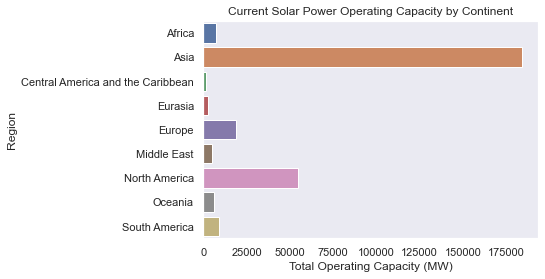

In [28]:
ax1 = sns.barplot(y='Region', x = 'sum_capacity_MW', data=continents[continents['Status']=='operating'])
ax1.set_title('Current Solar Power Operating Capacity by Continent')
ax1.set_xlabel('Total Operating Capacity (MW)')
#ax1.set_xticklabels(region_list,rotation=90)

Text(0.5, 0, 'Operating Capacity under construction (MW)')

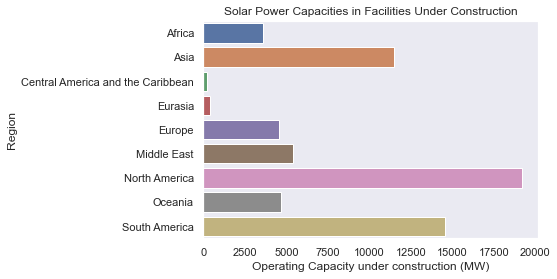

In [29]:
ax2 = sns.barplot(y='Region', x = 'sum_capacity_MW', data=continents[continents['Status'].isin(['construction'])])
ax2.set_title('Solar Power Capacities in Facilities Under Construction')
ax2.set_xlabel('Operating Capacity under construction (MW)')
#ax1.set_xticklabels(region_list,rotation=90)

In [72]:

continents[continents['Status'].isin(['construction'])]


,Region,Status,n_projects,min_capacity_MW,max_capacity_MW,sum_capacity_MW,mean_capacity_MW,min_year,max_year,mean_year,median_year
2,Africa,construction,38,11,800,3585,113.265152,2017.0,2024.0,2021.727273,2022.0
8,Asia,construction,105,20,1000,11499,85.988074,2021.0,2024.0,2021.628157,2022.0
15,Central America and the Caribbean,construction,6,26,65,239,39.500000,2021.0,2022.0,2021.500000,2021.5
21,Eurasia,construction,5,30,230,384,134.250000,2023.0,2023.0,2023.000000,2023.0
27,Europe,construction,53,20,338,4531,82.352564,2020.0,2025.0,2021.979825,2021.0
33,Middle East,construction,12,20,1500,5372,492.761905,2021.0,2027.0,2022.866667,2022.0
39,North America,construction,175,20,690,19225,103.726935,2019.0,2029.0,2021.500494,2021.0
45,Oceania,construction,25,27,650,4696,129.478261,2021.0,2023.0,2021.863636,2022.0
51,South America,construction,161,20,600,14569,130.296131,2020.0,2024.0,2021.925731,2021.5


Text(0.5, 0, 'Operating Capacity in development (MW)')

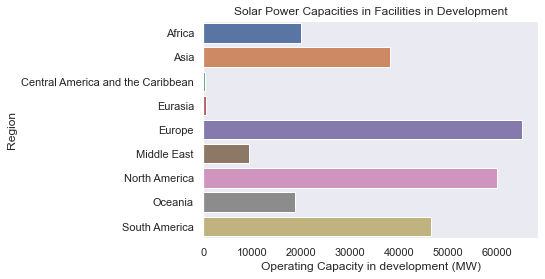

In [30]:
ax3 = sns.barplot(y='Region', x = 'sum_capacity_MW', data=continents[continents['Status'].isin(['development'])])
ax3.set_title('Solar Power Capacities in Facilities in Development')
ax3.set_xlabel('Operating Capacity in development (MW)')

Text(0.5, 0, 'Operating Capacity Announced Facilities (MW)')

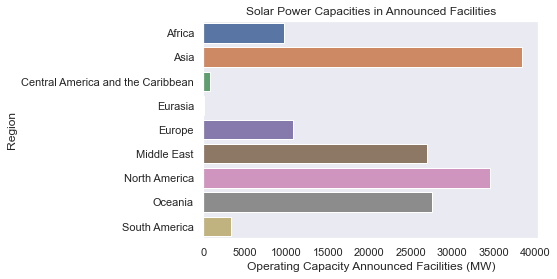

In [31]:
ax4 = sns.barplot(y='Region', x = 'sum_capacity_MW', data=continents[continents['Status'].isin(['announced'])])
ax4.set_title('Solar Power Capacities in Announced Facilities')
ax4.set_xlabel('Operating Capacity Announced Facilities (MW)')

Text(0.5, 0, 'Capacity (MW)')

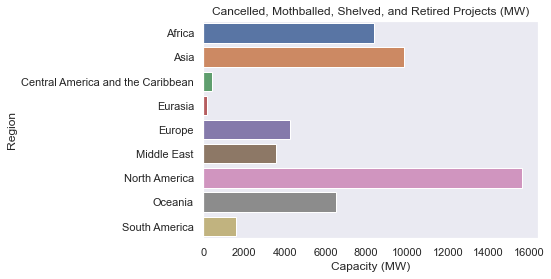

In [32]:
out_of_operation = continents[continents['Status'].isin(['shelved','mothballed','retired','cancelled'])].groupby('Region',as_index=False).agg({'sum_capacity_MW': 'sum'})

ax5 = sns.barplot(y='Region', x = 'sum_capacity_MW', data=out_of_operation)
ax5.set_title('Cancelled, Mothballed, Shelved, and Retired Projects (MW)')
ax5.set_xlabel('Capacity (MW)')

In [39]:
in_operation = continents[continents['Status'].isin(['operating','construction','development','announced'])].groupby('Region',as_index=False)

,Operating,In Construction,In Development,Announced
Africa,6986,3585,19888,9712
Asia,184439,11499,38188,38443
Central America and the Caribbean,1563,239,349,809
Eurasia,2805,384,456,100
Europe,19042,4531,65151,10831
Middle East,4667,5372,9220,26985
North America,54860,19225,59948,34533
Oceania,6097,4696,18738,27608
South America,9224,14569,46564,3278


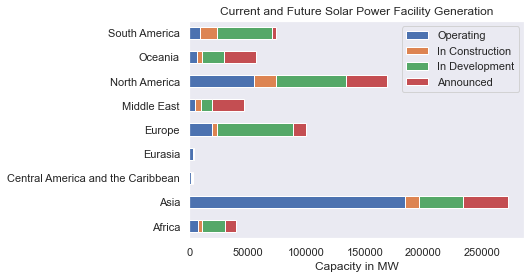

In [106]:
regions = continents[continents['Status'].isin(['construction'])]['Region']
operating = continents[continents['Status'].isin(['operating'])]['sum_capacity_MW']
construction = continents[continents['Status'].isin(['construction'])]['sum_capacity_MW']
development = continents[continents['Status'].isin(['development'])]['sum_capacity_MW']
announced = continents[continents['Status'].isin(['announced'])]['sum_capacity_MW']
width=0.55

current_planned_capacity = pd.DataFrame({'Operating':list(operating),
                                         'In Construction': list(construction),
                                         'In Development': list(development),
                                         'Announced': list(announced)},
                                       index = list(regions))

#fig, ax = plt.subplots()
#b1 = ax.barh(regions, operating, width, label='operating')
#lefts=operating
#b2 = ax.barh(regions, construction, width, left=lefts, label='construction')
#lefts= lefts + construction
#b3 = ax.barh(labels, development, width, left=lefts, label='in development')

current_planned_capacity.plot(kind='barh',stacked=True)
plt.title('Current and Future Solar Power Facility Generation')
plt.xlabel('Capacity in MW')
#plt.xticks(labels=regions)
current_planned_capacity


In [118]:
#which countries are considered to be "Eurasia" and "Central America" anyway?

Eurasian_countries = summary[summary.Region == 'Eurasia'].Country.unique()
centralam_countries = summary[summary.Region == 'Central America and the Caribbean'].Country.unique()

print('Countries in Eurasia: {}'.format(Eurasian_countries))
print('Eurasia Count: {}'.format(len(Eurasian_countries)))
print('Countries in Central America and the Carribean: {}'.format(centralam_countries))
print('Central America and the Carribean Count: {}'.format(len(centralam_countries)))



Countries in Eurasia: ['Armenia' 'Azerbaijan' 'Georgia' 'Russia' 'Turkey']
Eurasia Count: 5
Countries in Central America and the Carribean: ['Barbados' 'Cuba' 'Dominican Republic' 'El Salvador' 'Guatemala' 'Haiti'
 'Honduras' 'Jamaica' 'Nicaragua' 'Panama' 'Puerto Rico'
 'Saint Kitts and Nevis' 'Trinidad and Tobago']
Central America and the Carribean Count: 13
